# Machine Learning Engineer Nanodegree 

## Capstone Project: Building a Handwritten Digit Recognizer

## Introduction
In this project, we are going to build a Deep Neural Network(DNN) that can recognize the digit handwritten in an image. The DNN is trained over MNIST dataset containing handwritten digits and their respective numerical digit. 

## Requirements
- [Anaconda2](https://www.continuum.io/downloads)
- [Tensorflow](https://www.tensorflow.org/) or [Theano](http://www.deeplearning.net/software/theano/)
- [Keras](https://keras.io/)
- [OpenCV](http://opencv.org/)
- (Optional) A GPU with Cuda support is highly recommended for fast computation. Install respective graphics drivers, cuda toolkit, cudnn, [tensorflow-gpu](https://www.tensorflow.org/get_started/os_setup) version

## Data Exploration

Run the below code to import the required python libraries and initialize variables

In [1]:
from __future__ import print_function
from numpy import random
from keras.datasets import mnist # helps in loading the MNIST dataset
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
from keras.utils.np_utils import probas_to_classes
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import cv2
#to plot inside the notebook itself
%matplotlib inline 

# to be able to reproduce the same randomness
random.seed(42)  

# No of rows and columns in the image
img_rows = 28
img_cols = 28

#No of output classes (0-9)
nb_classes = 10

Using TensorFlow backend.


### Load the Dataset
Keras provides api to download and load the mnist dataset in a single line. Run the below line to download and load the dataset as training and testing set. 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")
# Show the number of rows and columns 
print("Row pixels in each image : {}.".format(X_train.shape[1]))
print("Column pixels in each image : {}.".format(X_train.shape[2]))
print("\n")
print("Successfully Downloaded and Loaded the dataset")

Training set has 60000 samples.
Testing set has 10000 samples.


Row pixels in each image : 28.
Column pixels in each image : 28.


Successfully Downloaded and Loaded the dataset


### Visualize an Image sample
Let's plot the first image sample in the training set using matplotlib.

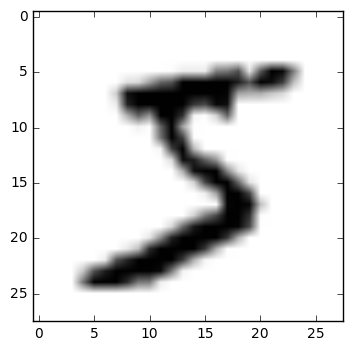

In [3]:
# Show the handwritten image
plt.imshow(X_train[0], cmap=cm.binary) 

### Preprocess the Data

Keras can use either tensorflow or theano. While they both represent image in different format. Theano uses the format (no. of color channels, no. of rows, no. of cols) and tensorflow uses (no. of rows, no. of cols, no. of color channels). Thus a wrapper is needed when switching backends. Run the below code to ensure that the image is in the correct ordering for the respective background. 

In [4]:
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print("The data is reshaped to the respective format!" , input_shape)

The data is reshaped to the respective format! (28, 28, 1)


The MNIST dataset contains grayscale images where the color channel value varies from 0 to 255. In order to reduce the computational load and training difficulty, we will map the values from 0 - 255 to 0 - 1 by dividing each pixel values by 255. Run the below code to do this.

In [5]:
X_train = X_train.astype('float32') #converted to float so that it can hold floating values between 0-1
X_test = X_test.astype('float32') #converted to float so that it can hold floating values between 0-1
X_train /= 255
X_test /= 255

The target labels y_train,y_test are in the form of numerical integers(0-9), we need to convert them to binary form in order for the neural network to perform mapping from input to output correctly and efficiently. Run the below code to do this.

In [6]:
print("In Integer form : ", y_train,y_test)

Y_train = np_utils.to_categorical(y_train, nb_classes) #converted to their binary forms
Y_test = np_utils.to_categorical(y_test, nb_classes) #converted to their binary forms

print("In Binary form : ", Y_train,Y_test)

In Integer form :  [5 0 4 ..., 5 6 8] [7 2 1 ..., 4 5 6]
In Binary form :  [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]] [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [7]:
print("Preprocessing of Data is Done Successfully...")

Preprocessing of Data is Done Successfully...


## Implementing the Deep Neural Network (DNN)

### Build the Model
Run the code below to build the Deep Neural Network

In [8]:
pool_size = (2, 2)
kernel_size = (3, 3)

model = Sequential()

model.add(Convolution2D(32, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print("Successfully built the DNN Model!")

Successfully built the DNN Model!


### Compile the Model
The model is compiled with 'categorical_crossentropy' as loss funtion, 'adadelta' as optimizer and 'accuracy' as metrics.

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
             )
print("Model Compilation completed!")

Model Compilation completed!


### Visualize the Model

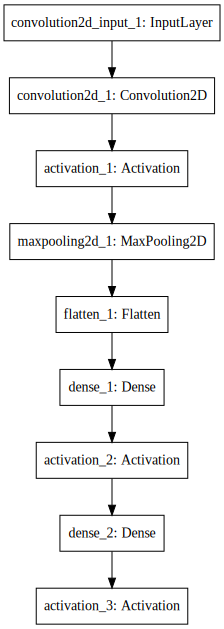

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Train the DNN Model
Now let's the train the DNN Model built above with mnist training dataset(X_train,Y_train). 

In [11]:
batch_size = 128
nb_epoch=10 

start = time.time()
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1,validation_data=(X_test, Y_test))
done = time.time()

elapsed = (done - start)/60

print("Model trained Successfully : Took - {} mins!".format(elapsed))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s - loss: 0.8680 - acc: 0.7994 - val_loss: 0.3598 - val_acc: 0.9004
Epoch 2/10
60000/60000 [==============================] - 21s - loss: 0.3307 - acc: 0.9053 - val_loss: 0.2823 - val_acc: 0.9215
Epoch 3/10
60000/60000 [==============================] - 21s - loss: 0.2763 - acc: 0.9201 - val_loss: 0.2403 - val_acc: 0.9320
Epoch 4/10
60000/60000 [==============================] - 21s - loss: 0.2447 - acc: 0.9296 - val_loss: 0.2200 - val_acc: 0.9362
Epoch 5/10
60000/60000 [==============================] - 21s - loss: 0.2202 - acc: 0.9358 - val_loss: 0.1957 - val_acc: 0.9431
Epoch 6/10
60000/60000 [==============================] - 21s - loss: 0.2005 - acc: 0.9417 - val_loss: 0.1801 - val_acc: 0.9474
Epoch 7/10
60000/60000 [==============================] - 21s - loss: 0.1840 - acc: 0.9464 - val_loss: 0.1654 - val_acc: 0.9512
Epoch 8/10
60000/60000 [==============================

In the neural network terminology:
- **one epoch** - one forward pass and one backward pass of all the training examples
- **batch size** - the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

Reference : https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network/164875#164875

### Evaluate the DNN Model
Now let's the test the DNN Model built above with mnist test dataset(X_test,Y_test). 

In [167]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss Value:', score[0])
print('Test Accuracy Value:', score[1])

Test Loss Value: 0.139938012361
Test Accuracy Value: 0.9582


## Refinement of the Deep Neural Network(DNN)

### Build a Refined Model
Let's refine the above model by making it much deeper by adding extra convolutional, dense, activation dropout layer and changing the optimizer to adam.

In [8]:
pool_size = (2, 2)
kernel_size = (3, 3)

rmodel = Sequential()

rmodel.add(Convolution2D(32, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
rmodel.add(Activation('relu'))
rmodel.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
rmodel.add(Activation('relu'))
rmodel.add(MaxPooling2D(pool_size=pool_size))
rmodel.add(Dropout(0.25))

rmodel.add(Flatten())
rmodel.add(Dense(128))
rmodel.add(Activation('relu'))
rmodel.add(Dropout(0.5))
rmodel.add(Dense(nb_classes))
rmodel.add(Activation('softmax'))

print("Successfully built the Refined DNN Model!")

Successfully built the Refined DNN Model!


### Compile the Refined Model
The refined model is compiled with 'categorical_crossentropy' as loss funtion, 'adam' as optimizer and 'accuracy' as metrics.

In [9]:
rmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print("Refined Model Compilation completed!")

Refined Model Compilation completed!


### Visualize the Refined Model

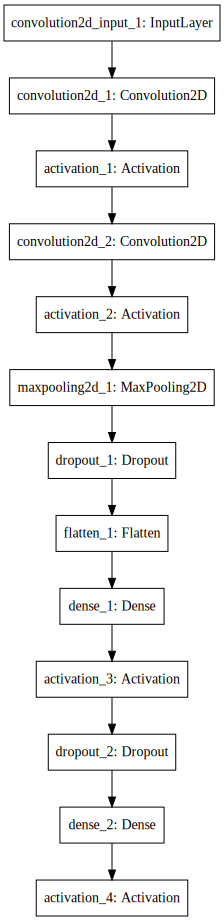

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(rmodel).create(prog='dot', format='svg'))

### Train the Refined DNN Model
Now let's the train the DNN Model built above with mnist training dataset(X_train,Y_train). 

In [11]:
batch_size = 128
nb_epoch=10 

start = time.time()
rmodel.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
done = time.time()

elapsed = (done - start)/60

print("Refined Model trained Successfully : Took - {} mins!".format(elapsed))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 83s - loss: 0.2688 - acc: 0.9181 - val_loss: 0.0579 - val_acc: 0.9823
Epoch 2/10
60000/60000 [==============================] - 75s - loss: 0.0890 - acc: 0.9728 - val_loss: 0.0374 - val_acc: 0.9868
Epoch 3/10
60000/60000 [==============================] - 89s - loss: 0.0681 - acc: 0.9794 - val_loss: 0.0344 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 88s - loss: 0.0567 - acc: 0.9826 - val_loss: 0.0281 - val_acc: 0.9906
Epoch 5/10
60000/60000 [==============================] - 88s - loss: 0.0473 - acc: 0.9851 - val_loss: 0.0310 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 87s - loss: 0.0401 - acc: 0.9874 - val_loss: 0.0255 - val_acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 89s - loss: 0.0373 - acc: 0.9880 - val_loss: 0.0310 - val_acc: 0.9906
Epoch 8/10
60000/60000 [==============================

### Evaluate the Refined DNN Model
Now let's the test the DNN Model built above with mnist test dataset(X_test,Y_test). 

In [12]:
score = rmodel.evaluate(X_test, Y_test, verbose=0)
print('Test Loss Value:', score[0])
print('Test Accuracy Value:', score[1])

Test Loss Value: 0.0373758753725
Test Accuracy Value: 0.9906


## Test the Refined Model with Real Data
Lets load images of an handwritten digit and convert it to the required format and then predict what digit is written in it. 

### Load Images from Folder
Using opencv library, let's load images in a folder. Make sure to have the digit written in a white background(not transparent) similiar to the mnist dataset.
**Hint** If having images with transparent background, you can convert it into white background using the command(Ubuntu) *$convert -flatten input.png output.png*

In [162]:
import os, os.path

imgs = []
path = "/home/joel/PROJECTS/Udacity-MLND/Udacity-MLND-Capstone-Handwritting-Digit-Recognition/images"
count=0
for f in os.listdir(path):
    imgs.append(cv2.imread(os.path.join(path,f)))
    count+=1
print("Successfully loaded {} images".format(count))

Successfully loaded 11 images


### Preprocess the Loaded Image
Using numpy, opencv let's preprocess the image into the format required by the model to predict

In [176]:
X_pred = []

for img in imgs:
    # Convert the color image to rgb
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Invert black and white color(since in opencv white is considered 255 and black 0 but we need vice versa in order to match with the dataset)
    invert_gray = (255-gray)
    # Resize the image to 28,28 pixels as per the mnist dataset format
    resized = cv2.resize(invert_gray, (28, 28))

    # Convert the image format from (28,28) to (28,28,1) in order for the model to recognize
    resized = np.asarray(resized)
    resized.shape+=1,
    
    #scale the color channel from 0-255 to 0-1
    resized/=255
    
    X_pred.append(resized)
    
X_pred = np.asarray(X_pred)
print(X_pred.shape)

(11, 28, 28, 1)


### Predict the digit in the Images
Let's predict the number in the images using the refined model

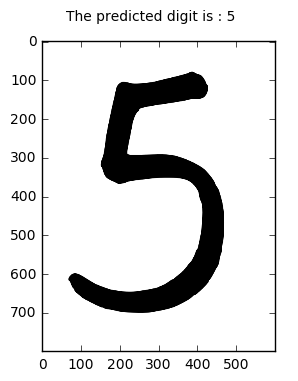

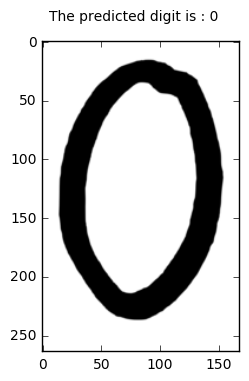

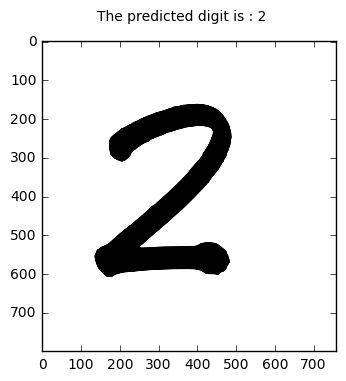

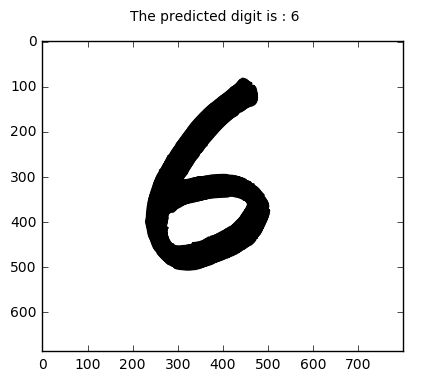

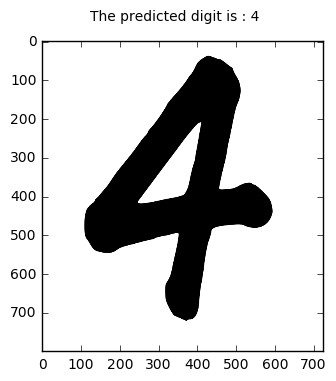

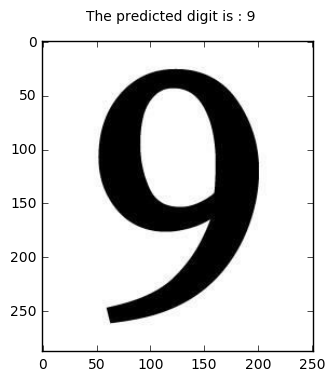

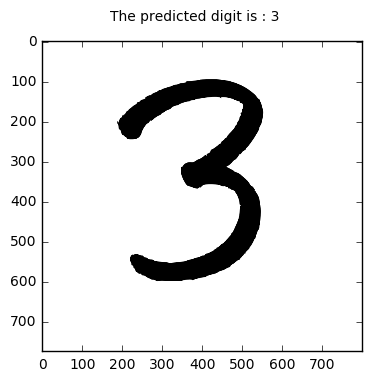

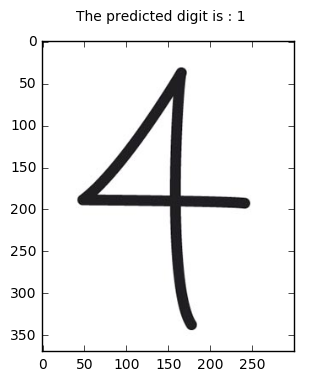

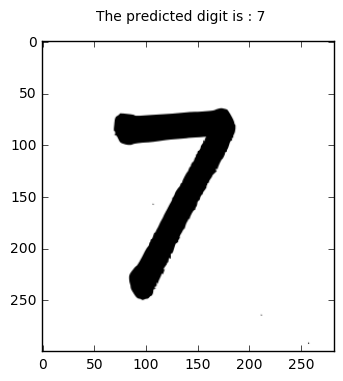

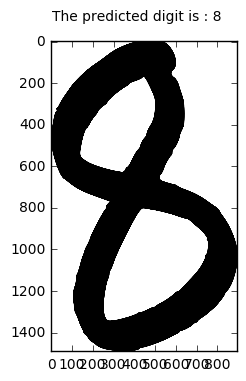

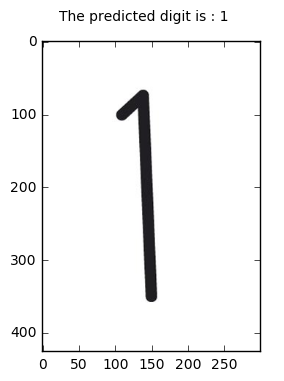

In [177]:
# Predict the output
proba = rmodel.predict(X_pred)
# Convert the predicted output to respective integer number
answers = probas_to_classes(proba)

#plot the image and the predicted number
i=0
for img in imgs:
    plt.figure()
    plt.imshow(img, cmap=cm.binary)
    plt.suptitle("The predicted digit is : " + str(answers[i]))
    i+=1

### Results
From the above results we can see that 10/11(Except for image with digit 4) predictions are correct.Thus our model has performed well enough.

## Conclusion
Thus we have successfully implemented a Deep Neural Network(DNN) that can be trained over the MNIST dataset and can be used in real time to predict the handwritten digit directly from any image file. The DNN Model built have an Accuracy score of 0.9906